Existen una serie de librerías que todo científico de datos debe conocer. A continuación veremos algunos de los usos básicos de estas librerías para conocer su aporte a nuestra base de código.

# NumPy: La base del cálculo numérico en Python

[NumPy](https://numpy.org/es/) es una librería fundamental para la computación científica en Python. Sus principales ventajas son:
- Operaciones vectorizadas que mejoran significativamente el rendimiento
- Arrays multidimensionales eficientes en memoria
- Funciones matemáticas optimizadas
- Integración con otras librerías científicas

Veamos algunos ejemplos prácticos:

In [ ]:
import time
import numpy as np # Alias muy común

# Comparación de rendimiento entre Python puro y NumPy
size = 1000000

# Lista Python
python_list = list(range(size))
start_time = time.time()
python_result = [x * 2 for x in python_list]
python_time = time.time() - start_time

# Array NumPy
numpy_array = np.array(range(size))
start_time = time.time()
numpy_result = numpy_array * 2
numpy_time = time.time() - start_time

print(f"Tiempo con lista Python: {python_time:.4f} segundos")
print(f"Tiempo con array NumPy: {numpy_time:.4f} segundos")
print(f"NumPy es {python_time/numpy_time:.1f}x más rápido")

Tiempo con lista Python: 0.0285 segundos
Tiempo con array NumPy: 0.0021 segundos
NumPy es 13.7x más rápido


Las operaciones sobre listas o elementos numéricos multidimensionales se vuelven muy costas y Numpy nos ofrece una vía fácil para acelerar todo ese proceso.

In [3]:
# Ejemplos de operaciones matriciales
matriz = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

print("\nOperaciones matriciales:")
print("Original:")
print(matriz)
print("\nTranspuesta:")
print(matriz.T)
print("\nInversa (si es posible):")

try:
    print(np.linalg.inv(matriz))
except np.linalg.LinAlgError:
    print("Matriz no invertible")


Operaciones matriciales:
Original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Transpuesta:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

Inversa (si es posible):
Matriz no invertible


Como vemos arriba, tenemos mecanismos de control de errores comunes en otros lenguajes. No son demasiado empleados en trabajos exploratorios pero definitivamente cobran relevancia según nos movemos hacia códigos productivos.

# Pandas: Análisis de datos estructurados

[Pandas](https://pandas.pydata.org/) es una librería esencial para el análisis de datos que proporciona estructuras de datos flexibles y herramientas para trabajar con datos estructurados. Sus principales ventajas son:
- DataFrames y Series para manejar datos tabulares
- Potentes funciones de agregación y análisis estadístico
- Facilidad para leer y escribir diferentes formatos de datos
- Manejo eficiente de datos faltantes

Veamos algunos ejemplos de análisis estadístico con Pandas:

In [5]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos de ventas
np.random.seed(42)
data = {
    'Producto': ['A', 'B', 'C', 'A', 'B', 'C'] * 10,
    'Ventas': np.random.normal(100, 20, 60),
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 60)
}

df = pd.DataFrame(data)
df.head(10) # Primeros 10 elementos

,Producto,Ventas,Region
0,A,109.934283,Sur
1,B,97.234714,Norte
2,C,112.953771,Oeste
3,A,130.460597,Este
4,B,95.316933,Este
5,C,95.317261,Sur
6,A,131.584256,Oeste
7,B,115.348695,Norte
8,C,90.610512,Este
9,A,110.851201,Oeste


Puede darnos estadísticas sobre los campos de forma sencilla, con un solo comando.

In [6]:
# Análisis estadístico básico
print("Estadísticas descriptivas por producto:")
print(df.groupby('Producto')['Ventas'].describe())

Estadísticas descriptivas por producto:
          count        mean        std        min        25%         50%  \
Producto                                                                   
A          20.0  101.109844  14.868125  78.845781  89.022821  100.812130   
B          20.0   94.685455  20.449525  60.806598  84.782014   94.647429   
C          20.0   94.925420  18.923021  65.501643  76.630878   94.741693   

                 75%         max  
Producto                          
A         108.119041  131.584256  
B         108.661284  137.045564  
C         107.919641  129.312975  


Aunque también nos permite actuar sobre campos concretos y operar mediante agrupaciones.

In [7]:
print("\nMediana de ventas por región:")
print(df.groupby('Region')['Ventas'].median())


Mediana de ventas por región:
Region
Este      90.698868
Norte    100.331040
Oeste    104.269118
Sur      100.540310
Name: Ventas, dtype: float64


No es casualidad que muchas de las funciones tengan un homologo en SQL ya que las estructuras tabulares y funciones estadísticas han sido empleadas mucho antes de la existencia de Pandas, con lo que en muchos casos veremos un traducción directa que incluso podemos expresar usando sentencias SQL.

In [13]:
# Pivot table para análisis cruzado
print("\nTabla pivote de ventas medias por Producto y Región:")
pivot_table = pd.pivot_table(df, 
                           values='Ventas', 
                           index='Producto',
                           columns='Region',
                           aggfunc='mean')
print(pivot_table)


Tabla pivote de ventas medias por Producto y Región:
Region          Este       Norte       Oeste         Sur
Producto                                                
A         100.829911   96.839107  107.917653   95.886901
B          83.826213   99.352982   89.349412  111.809962
C          89.940593  102.618878  116.232337   89.040570


Veremos que gran parte de la labor de estudio es realizar un análisis estadístico de los datos, y para eso necesitamos conocer este tipo de operativa de forma precisa ya que podemos llegar a tomar decisiones erróneas en el resumen de datos como la media ante distribuciones no normales.

## Scipy

[Scipy](https://scipy.org/) es una librería de Python que amplía las capacidades de NumPy, proporcionando herramientas avanzadas para el análisis científico y técnico. Incluye módulos para estadística, optimización, álgebra lineal, integración, procesamiento de señales y mucho más. Es fundamental para realizar análisis estadísticos más complejos y pruebas de hipótesis en ciencia de datos.

In [14]:
# Análisis más avanzado
from scipy import stats

productos = [group for name, group in df.groupby('Producto')['Ventas']]
f_statistic, p_value = stats.f_oneway(*productos)
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

F-statistic: 0.7979
p-value: 0.4552


El resultado del análisis estadístico avanzado realizado con `scipy.stats.f_oneway` muestra lo siguiente:

- **F-statistic:** 0.7979
- **p-value:** 0.4552

Esto indica que, al comparar las medias de ventas entre los diferentes productos (A, B y C), no se observa una diferencia estadísticamente significativa. El valor p es mucho mayor que el umbral típico de 0.05, por lo que no podemos rechazar la hipótesis nula de que las medias de ventas son iguales entre los productos. 

En resumen, según este análisis, no hay evidencia suficiente para afirmar que las ventas medias difieren entre los productos analizados.

In [15]:
from scipy.stats import shapiro

# Análisis de normalidad sobre la variable 'Ventas' usando la prueba de Shapiro-Wilk
stat, p = shapiro(df['Ventas'])
print(f"Estadístico de Shapiro-Wilk: {stat:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("La variable 'Ventas' NO sigue una distribución normal (rechazamos H0).")
else:
    print("No se puede rechazar la normalidad para 'Ventas' (no se rechaza H0).")

Estadístico de Shapiro-Wilk: 0.9880
p-value: 0.8232
No se puede rechazar la normalidad para 'Ventas' (no se rechaza H0).


Esto indicaría que podemos asumir normalidad y por lo tanto podemos entender la media como un buen estimador de centralidad.

# Matplotlib: Visualización de datos

[Matplotlib](https://matplotlib.org/) es la librería estándar para la visualización de datos en Python. Sus ventajas principales son:
- Permite crear gráficos de alta calidad y personalizables
- Compatible con otros paquetes como Pandas y NumPy
- Ideal para explorar distribuciones y relaciones entre variables

A continuación, un ejemplo de visualización de la distribución de los datos:

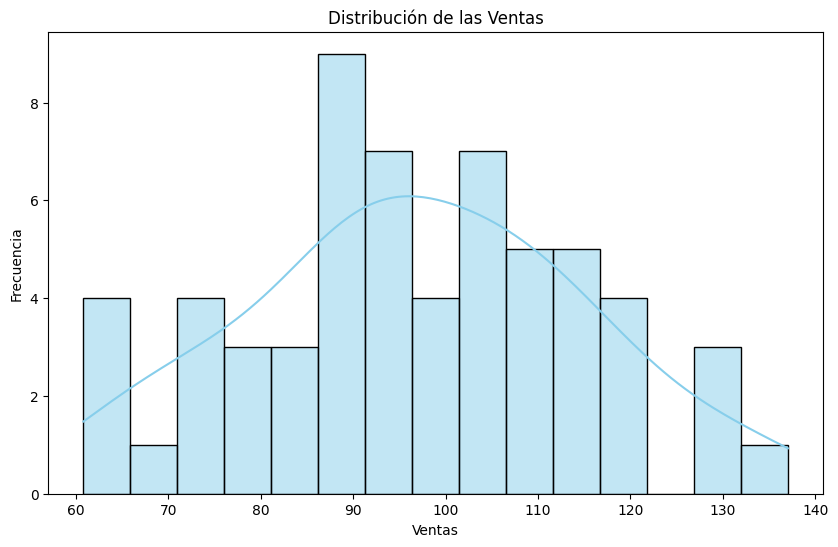

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos el DataFrame df creado anteriormente
plt.figure(figsize=(10, 6))
sns.histplot(df['Ventas'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de las Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

Vemos que ventas muestra esa forma acampanada que nos indica una potencial distribución normal. Por tanto puedo asumir con cierta confianza que las ventas se encuentran alrededor de la media con una cobertura de +/- la desviación estándar.

In [20]:
print(f"Nuestro valor esperado de ventas es de {df["Ventas"].mean()} (+/- {df["Ventas"].std()}) ")

Nuestro valor esperado de ventas es de 96.90690633859022 (+/- 18.170422416442378) 


La **desviación estándar** mide cuánto se dispersan los valores de ventas respecto a la media. En un contexto de distribución normal, aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media, y alrededor del 95% dentro de dos desviaciones estándar. Esto significa que la mayoría de las ventas estarán cerca del valor medio, y la desviación estándar nos indica cuán concentradas o dispersas están esas ventas alrededor de ese promedio. Una desviación estándar baja implica ventas más consistentes; una alta, mayor variabilidad.

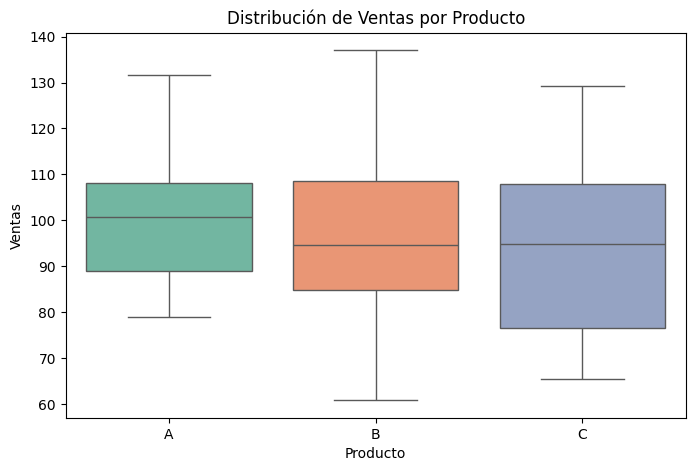

In [21]:
# Gráfico de caja por producto
plt.figure(figsize=(8, 5))
sns.boxplot(x='Producto', y='Ventas', data=df, palette='Set2', hue='Producto')
plt.title('Distribución de Ventas por Producto')
plt.show()

El diagrama de cajas nos ayuda a entender más sobre la distribución. Es como si la viéramos desde arriba.

![](https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg)